In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("sales.csv")

print("First 5 Rows:")
print(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())


First 5 Rows:
                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Tota

In [13]:
print(df.columns)

Index(['Order ID', 'Order Date', 'Customer Name', 'Gender', 'Age', 'Product',
       'Region', 'City', 'Quantity', 'Unit Price', 'Discount (%)',
       'Sales Channel', 'Customer Segment', 'Order Status', 'Category',
       'Sub-Category', 'Revenue', 'Profit', 'Age Group', 'Month'],
      dtype='object')


In [2]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])


In [3]:
print("Total Revenue:", df["Total Revenue"].sum())


Total Revenue: 137348768.31


In [4]:
print("Total Profit:", df["Total Profit"].sum())


Total Profit: 44168198.39999999


In [5]:
top_countries = df.groupby("Country")["Total Profit"].sum().sort_values(ascending=False).head()
print(top_countries)


Country
Djibouti    2425317.87
Myanmar     1802771.70
Pakistan    1719922.04
Samoa       1678540.98
Honduras    1609947.52
Name: Total Profit, dtype: float64


In [6]:
region_sales = df.groupby("Region")["Total Revenue"].sum()
print(region_sales)


Region
Asia                                 21347091.02
Australia and Oceania                14094265.13
Central America and the Caribbean     9170385.49
Europe                               33368932.11
Middle East and North Africa         14052706.58
North America                         5643356.55
Sub-Saharan Africa                   39672031.43
Name: Total Revenue, dtype: float64


In [7]:
top_items = df.groupby("Item Type")["Units Sold"].sum().sort_values(ascending=False)
print(top_items.head())


Item Type
Cosmetics        83718
Clothes          71260
Beverages        56708
Fruits           49998
Personal Care    48708
Name: Units Sold, dtype: int64


In [8]:
top_countries.to_csv("top_countries_profit.csv")
region_sales.to_csv("region_sales.csv")


In [9]:
print("Country ")

Country 


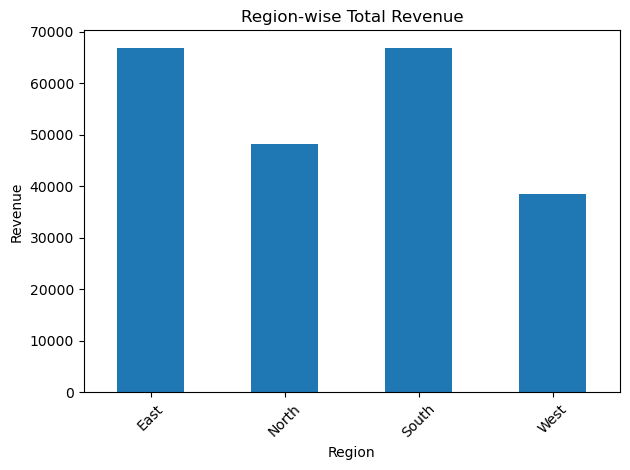

<Figure size 640x480 with 0 Axes>

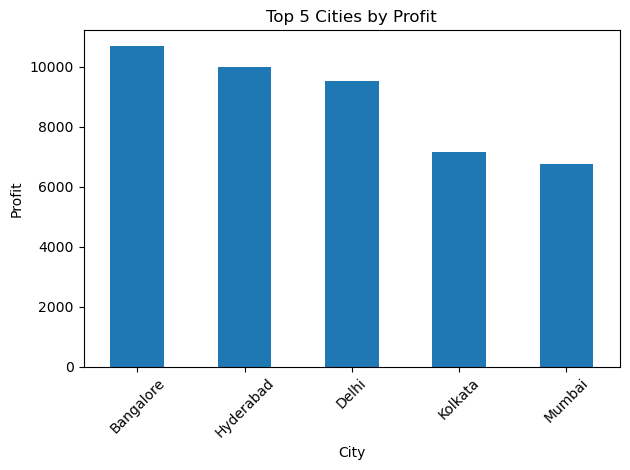

<Figure size 640x480 with 0 Axes>

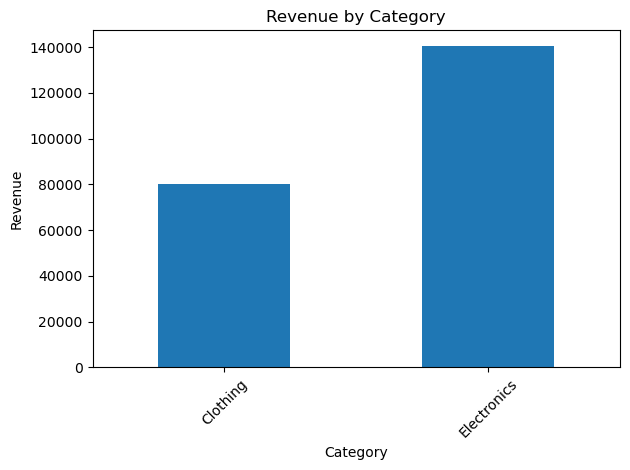

<Figure size 640x480 with 0 Axes>

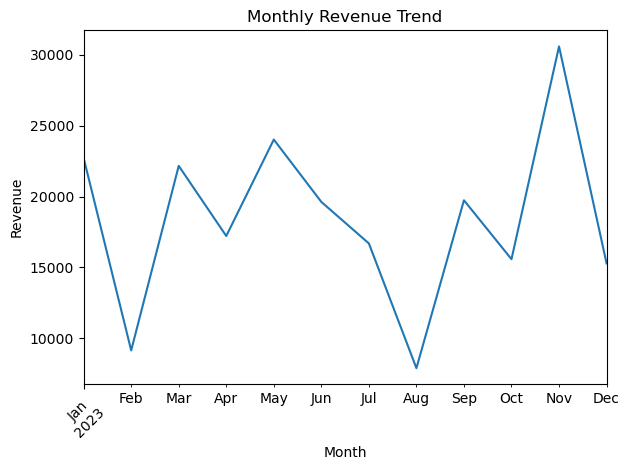

<Figure size 640x480 with 0 Axes>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("sales_data.csv")

# Remove extra spaces 
df.columns = df.columns.str.strip()

# Convert Order Date
df["Order Date"] = pd.to_datetime(df["Order Date"])

# -------------------------------
# 1️⃣ Region-wise Revenue
# -------------------------------
region_sales = df.groupby("Region")["Revenue"].sum()

plt.figure()
region_sales.plot(kind="bar")
plt.title("Region-wise Total Revenue")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("region_revenue.png")


# -------------------------------
# 2️⃣ Top 5 Cities by Profit
# -------------------------------
top_cities = df.groupby("City")["Profit"].sum().sort_values(ascending=False).head()

plt.figure()
top_cities.plot(kind="bar")
plt.title("Top 5 Cities by Profit")
plt.xlabel("City")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("top_cities")


# -------------------------------
# 3️⃣ Category-wise Sales
# -------------------------------
category_sales = df.groupby("Category")["Revenue"].sum()

plt.figure()
category_sales.plot(kind="bar")
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("category_sales")

# -------------------------------
# 4️⃣ Monthly Revenue Trend
# -------------------------------
df["Month"] = df["Order Date"].dt.to_period("M")
monthly_revenue = df.groupby("Month")["Revenue"].sum()

plt.figure()
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("monthly_revenue")
